In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Domestic', 'Government', min_assets=.8)
equities = screen_funds('Equities', 'Domestic', 'Large-Cap', min_assets=.8)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

22 92
from 2019-05-20 to 2019-07-09 - 114


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

113


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
VMBS,30,0.254233,0.230964,0.928934,1.573351,0.264901
MBB,30,0.255504,0.233698,0.923508,1.561757,0.325100
IEF,30,0.506315,0.597084,0.781518,3.065268,0.797894
TLH,30,0.688133,0.844669,0.767698,4.319568,0.958992
SPTL,30,0.891136,1.183410,0.719492,5.841329,1.628163
VGLT,30,0.894862,1.205766,0.709241,5.779305,1.634910
TLT,30,0.903125,1.237016,0.698004,5.855882,1.698879
GOVT,30,0.365177,0.472561,0.688789,2.209655,0.657641
SCHR,30,0.353599,0.456468,0.687708,2.059242,0.618182


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/optimize.py:2341: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


evicted MBB 0.770 -0.383
retry backlogs ['SCHD', 'FEX', 'RPG', 'JKE', 'FTC', 'JHML', 'ADX', 'LRGF', 'VONV', 'ONEQ', 'DGRW', 'SCHK', 'SCHV', 'RSP', 'QDF', 'SPHQ', 'SPLG', 'DLN', 'FTCS', 'HDV', 'VV', 'VTI', 'VONG', 'VYM', 'DGRO', 'DHS', 'SUSA', 'VIG', 'SPTM', 'QQQ', 'SCHO', 'SDY', 'FVD', 'NOBL', 'DSI', 'SCHB', 'VOO', 'IVW', 'VTV', 'DTN', 'IEI', 'QUAL', 'IWV', 'MTUM', 'PKW', 'VONE', 'IWB', 'IYY', 'MGV', 'PRF', 'VOOG', 'VMBS', 'FTA', 'SPYG', 'ITOT', 'IWD', 'SPY', 'IUSV', 'SCHX', 'IPE', 'GSLC', 'IVV', 'SPLV', 'VTIP', 'DIA', 'SCHR', 'VGIT', 'IVE', 'VGLT', 'TLT', 'XLG', 'GOVT', 'IUSG', 'IWF', 'MGC', 'SHY', 'SCHG', 'SPTL', 'TIP', 'MGK', 'SPTS', 'VUG', 'STIP', 'TLH', 'TDTT', 'VGSH', 'OEF', 'CFO', 'JKD', 'IEF', 'FNDX', 'SPYV', 'SCHP', 'PWV', 'RDIV', 'VOOV', 'FV', 'MOAT', 'FPX', 'SDOG', 'SPYD', 'RPV', 'FDL', 'TILT', 'CET', 'USMV', 'DVY', 'USA', 'RWL'] at 0.905/-0.52 - 1.663
evicted TIP 0.894 -0.509
evicted USMV 0.879 -0.509
retry backlogs ['SCHD', 'FEX', 'RPG', 'JKE', 'FTC', 'JHML', 'ADX', 'LRGF'

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.022493,0.590030,-0.208387,0.676797,1.053778,1.347203,2.535809,1.665696,6.502983,1.100757
EDV,30.0,1.164075,1.668130,-2.141637,0.071757,0.651914,1.620299,5.231127,0.674044,7.711619,2.610604
PWV,30.0,0.772729,1.900229,-3.014389,0.044051,0.929709,1.787800,4.873813,0.385767,4.410995,4.673677
QQQ,30.0,1.041333,2.627463,-4.512806,-0.707288,0.811754,2.907064,7.659307,0.381223,6.185914,6.440085
VLUE,30.0,0.828631,2.245446,-3.985411,0.059789,1.397851,1.917667,4.888826,0.351355,4.407866,6.135276


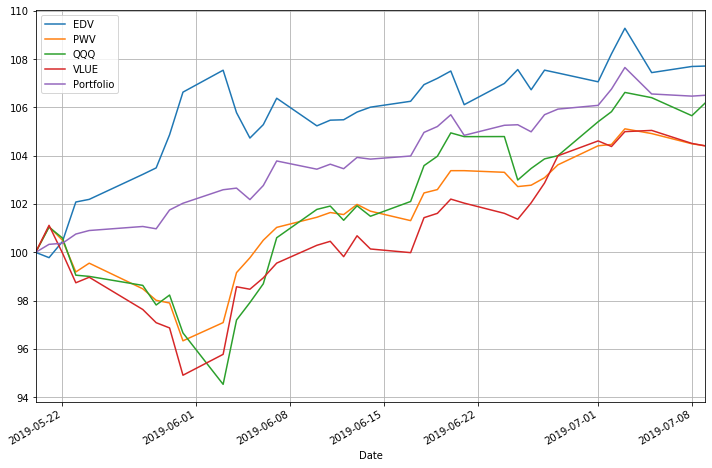

In [4]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(.1)
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.039539,0.603526,-0.218569,0.702303,1.095280,1.412623,2.605981,1.656691,6.604395,1.113113
EDV,30.0,1.164075,1.668130,-2.141637,0.071757,0.651914,1.620299,5.231127,0.674044,7.711619,2.610604
QQQ,30.0,1.041333,2.627463,-4.512806,-0.707288,0.811754,2.907064,7.659307,0.381223,6.185914,6.440085
VLUE,30.0,0.828631,2.245446,-3.985411,0.059789,1.397851,1.917667,4.888826,0.351355,4.407866,6.135276


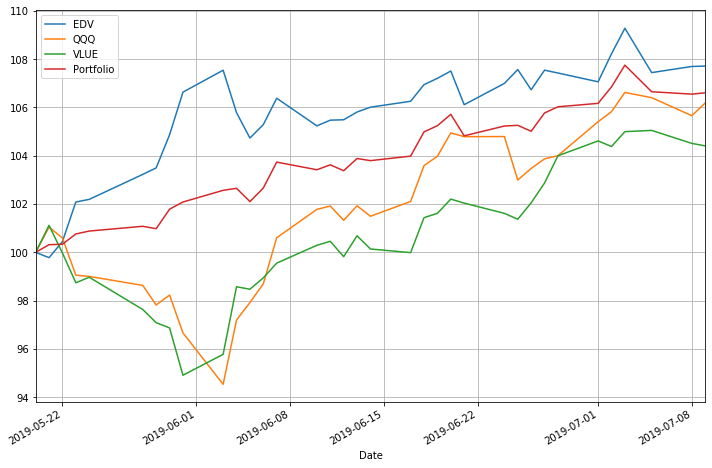

In [7]:
quote.graph({'EDV': 0.591, 'QQQ': 0.136, 'VLUE': 0.272})

In [ ]:
quote2 = Quote(['EDV', 'MTUM'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)